# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Step 1. Open the data file and study the general information. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


data_raw=pd.read_csv('vehicles_us.csv')

#print general information of the dataframe
data_raw.info()

display (data_raw.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Conclusion

1. By using info() method, we checked the general table information like columns name, their datatype and count of null values etc. 
2. By examine the outcome, we found that there are some columns which contains null values.
3. To analyse all data in detail, we have to process the table further. 

## Step 2. Data preprocessing

In [3]:
print(data_raw.isnull().sum())


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


### Conclusion: 
Found null values for the following column:
1. model_year
2. cylinders
3. odometer
4. paint_color
5. is_4wd

So before analyse the factors which influence the vehicle's Price, First try to fill null values to all these column one by one.

#### 1. Verifying and updating model_year

In [4]:
print('######### Before Updation ##########')
print()
#print(data_raw['model_year'].value_counts())
display(data_raw['model_year'].describe())#checking some basic statistical details like mean, median etc.
print()

#fill all the null values with the median of model_year group by model wise.
print('count of null values in model_year: {0} '.format(data_raw['model_year'].isnull().sum()))#no null value

data_raw['model_year']=data_raw.groupby('model')['model_year'].transform(
    lambda x: x.fillna(x.median())
    )
print()
print('######### After Updation ##########')
print()
print('count of null values in model_year: {0} '.format(data_raw['model_year'].isnull().sum()))#All null values are filled.




######### Before Updation ##########



count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64


count of null values in model_year: 3619 

######### After Updation ##########

count of null values in model_year: 0 


In [5]:
display(data_raw[data_raw['model_year']==0])

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


##### conclusion


1. Found 3619 as null values. I think model_year is depends upon model so filled all null values with the median value of model_year group by model.
2. After updating null values, checked all rows for model_year=0 values. That's great! as no records available for 0 values otherwise we have to update those records as well.
2.  When checking basic statistical detail found that min value is far back compare to other values. So its seems there will be some outlier. 
3. Here just updating null values. We will verify all outlier in differnt section below.

#### 2. Verifying and updating cylinders

In [6]:
print('######### Before Updation ##########')
print()
print(data_raw['cylinders'].value_counts(ascending=False))#checking counts of all unique values in cylinders.
print()
print('count of null values in cylinders: ',data_raw['cylinders'].isnull().sum())#null count in the column.
print()
print(data_raw.groupby('type')['cylinders'].agg(['median','sum']))#verifying the query before updating.

#fill all the null values with the median of cylinders group by type wise.
data_raw['cylinders']=data_raw.groupby('type')['cylinders'].transform(
    lambda x: x.fillna(x.median())
    )

print()
print('######### After Updation ##########')
print()
print('count of null values in cylinders: ',data_raw['cylinders'].isnull().sum())
#data_raw.info()#verifying the column detail of model_year and cylinders


######### Before Updation ##########

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

count of null values in cylinders:  5260

             median      sum
type                        
SUV             6.0  66024.0
bus            10.0    182.0
convertible     8.0   2855.0
coupe           6.0  13425.0
hatchback       4.0   3814.0
mini-van        6.0   6169.0
offroad         6.0   1186.0
other           6.0   1280.0
pickup          8.0  45094.0
sedan           4.0  49854.0
truck           8.0  83144.0
van             6.0   3638.0
wagon           4.0   6719.0

######### After Updation ##########

count of null values in cylinders:  0


##### conclusion

1. First checked rows counts of all unique values in cylinders. All seems fine.
2. Now checked all null values count and which is 5260.
3. I think cylinders are based on type of vehicle so to fill the null values first group by type and then take the median values. 

#### 3. Verifying and updating odometer

In [7]:
print('######### Before Updation ##########')
print()
print(data_raw['odometer'].value_counts(ascending=False))#checking counts of all unique values in odometer.
print('count of null values in odometer: ',data_raw['odometer'].isnull().sum())#null count in the column.
print()

############################################################################################################################

#fill all the null values with the median of odometer group by (model_year,condition,price) wise.
data_raw['odometer']=data_raw.groupby(['model_year','condition','price'])['odometer'].transform(
    lambda grp:grp.fillna(grp.median())
                          )

print()
print('######### After Updation 1 ##########')
print()
print('count of null values in odometer, after first update: ',data_raw['odometer'].isnull().sum())


############################################################################################################################
#fill all the null values with the median of odometer group by (model_year,condition) wise.
data_raw['odometer']=data_raw.groupby(['model_year','condition'])['odometer'].transform(
    lambda grp:grp.fillna(grp.median())
                          )

print()
print('######### After Updation 2 ##########')
print()
print('count of null values in odometer, after second update: ',data_raw['odometer'].isnull().sum())

############################################################################################################################
#fill all the null values with the median of odometer group by model_year wise.
data_raw['odometer']=data_raw.groupby(['model_year'])['odometer'].transform(
    lambda grp:grp.fillna(grp.median())
                          )

print()
print('######### After Updation 3 ##########')
print()
print('count of null values in odometer, after final update: ',data_raw['odometer'].isnull().sum())




######### Before Updation ##########

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
51595.0       1
111381.0      1
155940.0      1
43402.0       1
74063.0       1
Name: odometer, Length: 17762, dtype: int64
count of null values in odometer:  7892


######### After Updation 1 ##########

count of null values in odometer, after first update:  1627

######### After Updation 2 ##########

count of null values in odometer, after second update:  7

######### After Updation 3 ##########

count of null values in odometer, after final update:  1


##### Conclusion

1. I think odometer is depends upon model_year,condition and price so first I update the null value with median of odometer group by all three parameter.
2. After updation, still found some null values so used two parameters model_year,condition and at the last only single i.e. model_year.
3. After final updation in odometer, There is still one row for the model_year=1929 which is not updated because no other record available for median calculation. 
4. Got no idea how to update this one record and also its just one record so we'll delete this row and continue our further analysis.

In [8]:
print('######### Before Deleting ##########')
print()
print('count of null values in odometer: ',data_raw['odometer'].isnull().sum())

data_raw=data_raw[data_raw['model_year']!=1929]#deleting the one record which we found above.
print()
print('######### After Deleting ##########')
print()
print('count of null values in odometer: ',data_raw['odometer'].isnull().sum())# finally all null have been removed.



######### Before Deleting ##########

count of null values in odometer:  1

######### After Deleting ##########

count of null values in odometer:  0


##### Data update for model_year=1908

In [9]:
print('######### Before updation ##########')
print()
#fetching record for the model_year=1908.
data_raw_model=data_raw[data_raw['model_year']==1908]
print('Records count for the model_year=1908: ',len(data_raw_model))

#Creating new DataFrame with model and their common model_year.
data_raw_modelyear_mode=data_raw.groupby('model')['model_year'].agg(lambda x: x.mode()[0])

#finding only those records which fall in model_year=1908
data_raw_modelyear_updated=data_raw_modelyear_mode[data_raw_modelyear_mode.index.isin(data_raw_model['model'])]
data_raw_modelyear_updated=data_raw_modelyear_updated.reset_index()
print(data_raw_modelyear_updated)

#update the records with mode of the model_year based on model(model for the year=1908)
for i in range(len(data_raw_modelyear_updated)):
    data_raw.loc[((data_raw['model_year']==1908) & (data_raw['model']==data_raw_modelyear_updated.loc[i, "model"]))
                ,'model_year']=data_raw_modelyear_updated.loc[i, "model_year"]
print()
print('######### After updation ##########')
print()
print('Records count for the model_year=1908: ',len(data_raw[data_raw['model_year']==1908]))


######### Before updation ##########

Records count for the model_year=1908:  2
               model  model_year
0  cadillac escalade      2009.0
1          gmc yukon      2008.0

######### After updation ##########

Records count for the model_year=1908:  0


<b>Cause for updating data for the model_year=1908:</b></br>
When I checked the records randomly found something wrong with the records for the model_year=1908. I dig further and found these both are automatic car so first thought these are invalid record as that time no automatic car was launched but when checked their model, it came after 1990 so now my thinking is their model_year has been added mistakenly that's why updated their model_year with the mode value 

#### 4. Verifying and updating paint_color

In [10]:
print('######### Before Updation ##########')
print()
print(data_raw['paint_color'].value_counts(ascending=False))#checking counts of all unique values in paint_color.
print('count of null values in paint_color: ',data_raw['paint_color'].isnull().sum())#null count in the column.
print()
#filling all the null values with mode value of paint_color group by model wise.
#data_raw['paint_color']=data_raw.groupby('model')['paint_color'].transform(lambda x: x.fillna(x.mode()[0]))

##########################################################################################################################
#filling null values with value as 'unknown' as recommended by reviewer's
data_raw['paint_color'].fillna('unknown',inplace=True)
##########################################################################################################################

print()
print('######### After Updation ##########')
print()
print('count of null values in paint_color: ',data_raw['paint_color'].isnull().sum())


######### Before Updation ##########

white     10029
black      7692
silver     6243
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64
count of null values in paint_color:  9267


######### After Updation ##########

count of null values in paint_color:  0


In [11]:
display(data_raw['paint_color'].value_counts())# checking the distribution by all unique color wise


white      10029
unknown     9267
black       7692
silver      6243
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

#### 5. Verifying and updating is_4wd

In [12]:
print('######### Before Updation ##########')
print()
print(data_raw['is_4wd'].value_counts(ascending=False))#checking counts of all unique values in is_4wd.
print('count of null values in is_4wd: ',data_raw['is_4wd'].isnull().sum())#null count in the column.
print()
#This is a boolean type column and all the available data contain 1 so update rest of the data with 0 value.
data_raw['is_4wd'].fillna(value=0,inplace=True)
print('######### After Updation ##########')
print()
print('count of null values in is_4wd: ',data_raw['is_4wd'].isnull().sum())
print()
data_raw.info()

######### Before Updation ##########

1.0    25572
Name: is_4wd, dtype: int64
count of null values in is_4wd:  25952

######### After Updation ##########

count of null values in is_4wd:  0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51524 non-null  int64  
 1   model_year    51524 non-null  float64
 2   model         51524 non-null  object 
 3   condition     51524 non-null  object 
 4   cylinders     51524 non-null  float64
 5   fuel          51524 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51524 non-null  object 
 8   type          51524 non-null  object 
 9   paint_color   51524 non-null  object 
 10  is_4wd        51524 non-null  float64
 11  date_posted   51524 non-null  object 
 12  days_listed   51524 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5

##### Conclusion
As is_4wd is a boolean type column and all the available data contain 1 so updated rest of the data with 0 value.


### So far we have updated all the null values, deleted and updated some invalid data now we'll:
1. Change the data type if required. 
2. Replace all string type data to lower case.
3. Delete all the duplicate data.


In [13]:
#Updating data types.
data_raw['price'] = data_raw['price'].astype('float')
data_raw['model_year'] = data_raw['model_year'].astype('int64')
data_raw['model'] = data_raw['model'].astype('str')
data_raw['condition'] = data_raw['condition'].astype('str')
data_raw['cylinders'] = data_raw['cylinders'].astype('int8')
data_raw['is_4wd'] = data_raw['is_4wd'].astype('bool')
data_raw['date_posted'] = pd.to_datetime(data_raw['date_posted'])
data_raw['fuel']=data_raw['fuel'].astype('str')
data_raw['transmission']=data_raw['transmission'].astype('str')
data_raw['type']=data_raw['type'].astype('str')
data_raw['paint_color']=data_raw['paint_color'].astype('str')
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  float64       
 1   model_year    51524 non-null  int64         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int8          
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  bool          
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), int8(1), object(6)
memory usage: 4.8+ MB


In the above cell , we have updated all the required data type.We can see the Impact of doing so by executing info(). After replacing data types, memory usage has dropped to 4.8+ from 5.5+.

In [14]:
#Replacing all string types to lower
data_raw['model']=data_raw['model'].str.lower()
data_raw['condition']=data_raw['condition'].str.lower()
data_raw['fuel']=data_raw['fuel'].str.lower()
data_raw['transmission']=data_raw['transmission'].str.lower()
data_raw['type']=data_raw['type'].str.lower()
data_raw['paint_color']=data_raw['paint_color'].str.lower()
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  float64       
 1   model_year    51524 non-null  int64         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int8          
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  bool          
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), int8(1), object(6)
memory usage: 4.8+ MB


In [15]:
#Delete all duplicates records
#printing the count of all duplicate records
#print('No. of duplicate records : {0}'.format(data_raw[['price','model_year','model','condition','cylinders',
 #                                                      'fuel','odometer','transmission','type','paint_color','is_4wd','date_posted',
  #                                                     'days_listed']].duplicated().sum()))

print('######### Before deleting duplicate ##########')
print()
print('No. of duplicate records : {0}'.format(data_raw[['price','model_year','model','condition','cylinders',
                                                   'fuel','odometer','transmission','type','paint_color','is_4wd']].duplicated().sum()))
print()
#found 8922 duplicate records. 

print('######### After deleting duplicate ##########')
print()
data_raw.sort_values('date_posted', ascending=False)
data_raw.drop_duplicates(subset =['price','model_year','model','condition','cylinders',
                                                       'fuel','odometer','transmission','type','paint_color','is_4wd'], 
                     keep='first', inplace = True)

print('No. of duplicate records : {0}'.format(data_raw[['price','model_year','model','condition','cylinders',
                                                       'fuel','odometer','transmission','type','paint_color','is_4wd']].duplicated().sum()))
   

######### Before deleting duplicate ##########

No. of duplicate records : 8922

######### After deleting duplicate ##########

No. of duplicate records : 0


##### conclusion

1. Find all duplicates without using date_posted column as sometimes it happens that same vehicle is placed for ad more than one time. It can be due to some reason so it was removed earlier and now its placed in the website again. so in that case their date_posted, days_listed changes.
2. Found 8922 records. So deleted all those.

## Step 3. Make calculations and add them to the table

##### Adding new column to the table

In [16]:
#adding column to the table 
data_raw['day']=pd.DatetimeIndex(data_raw['date_posted']).day
data_raw['month']=pd.DatetimeIndex(data_raw['date_posted']).month
data_raw['year']=pd.DatetimeIndex(data_raw['date_posted']).year

data_raw['vehicle_age']=((data_raw['year']-data_raw['model_year'])+1)#adding 1 to the vehicle_age as per reviewr's comment.
#data_raw['vehicle_age'].where(data_raw['vehicle_age']!=0, 1 ,inplace=True)# updating vehicle_age as 1 for all 0.

data_raw['day'] = data_raw['day'].astype('int8')
data_raw['month'] = data_raw['month'].astype('int8')

data_raw['average_mileage_perYear']=data_raw['odometer']/data_raw['vehicle_age']
data_raw['average_mileage_perYear']=data_raw['average_mileage_perYear'].apply(lambda x: round(x, 2))#

display(data_raw.head())
data_raw.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,average_mileage_perYear
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,23,6,2018,8,18125.00
1,25500.0,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.12
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.29
3,1500.0,2003,ford f-150,fair,8,gas,178569.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10504.06
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.67


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42602 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   price                    42602 non-null  float64       
 1   model_year               42602 non-null  int64         
 2   model                    42602 non-null  object        
 3   condition                42602 non-null  object        
 4   cylinders                42602 non-null  int8          
 5   fuel                     42602 non-null  object        
 6   odometer                 42602 non-null  float64       
 7   transmission             42602 non-null  object        
 8   type                     42602 non-null  object        
 9   paint_color              42602 non-null  object        
 10  is_4wd                   42602 non-null  bool          
 11  date_posted              42602 non-null  datetime64[ns]
 12  days_listed              42602 n

##### Conclusion

Added some columns like day, month, year, vehicle_age, average_mileage_perYear. We have added vehicle_age and average_mileage_perYear so that we can easily figure out the price dependency of vehicle on these factors.

##### Replacing condition column with the numeric scale

In [17]:
data_condition_dic={'salvage':0,'fair':1,'good':2,'excellent':3,'like new':4,'new':5}
if((data_raw.dtypes['condition']==np.object) & (len(data_raw.query('condition not in @data_condition_dic.keys()'))==0)):
    data_raw['condition_id']=data_raw['condition'].apply(lambda x : data_condition_dic[x])
    data_raw.drop(['condition'], axis=1,inplace=True)
    data_raw.rename(columns={"condition_id": "condition"},inplace=True)
    data_raw['condition']=data_raw['condition'].astype('int8')
else:
    print('Either Condition column are already converted to numeric scale or there are some invalid data in it.')

print(data_raw['condition'].isnull().sum())
display(data_raw.head(10))




0


,price,model_year,model,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,average_mileage_perYear,condition
0,9400.0,2011,bmw x5,6,gas,145000.0,automatic,suv,unknown,True,2018-06-23,19,23,6,2018,8,18125.00,2
1,25500.0,2011,ford f-150,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,8,11088.12,2
2,5500.0,2013,hyundai sonata,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.29,4
3,1500.0,2003,ford f-150,8,gas,178569.0,automatic,pickup,unknown,False,2019-03-22,9,22,3,2019,17,10504.06,1
4,14900.0,2017,chrysler 200,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.67,3
5,14990.0,2014,chrysler 300,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,20,6,2018,5,11590.80,3
6,12990.0,2015,toyota camry,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,27,12,2018,4,19803.00,3
7,15990.0,2013,honda pilot,6,gas,109473.0,automatic,suv,black,True,2019-01-07,68,7,1,2019,7,15639.00,3
8,11500.0,2012,kia sorento,4,gas,104174.0,automatic,suv,unknown,True,2018-07-16,19,16,7,2018,7,14882.00,3
9,9200.0,2008,honda pilot,6,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,15,2,2019,12,12265.92,3


In [18]:
#Added below section as per Reviewer's comment
display(data_raw['condition'].value_counts())# checking the distribution by all unique conditions

3    20582
2    16068
4     4124
1     1575
5      140
0      113
Name: condition, dtype: int64

##### Conclusion

1. Numeric scale for conditions have been added. So now it's easy to compare category relationship with price and also to plot
the diagrame.
2. After veiwing category wise data it's found that maximum vehicle belongs to 2 and 3 category of vehicle.

## Step 4. Carry out exploratory data analysis

### 1. Histogram for the parameters: price, vehicle's age, mileage, number of cylinders, and condition.

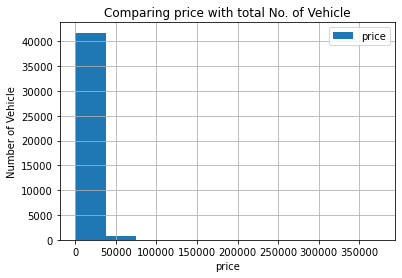

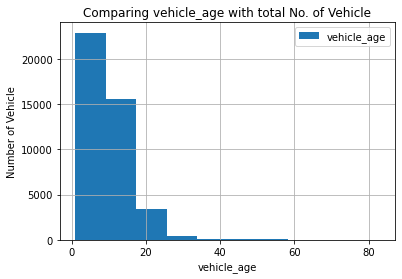

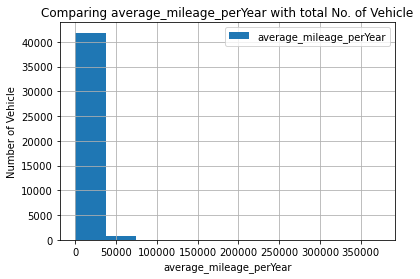

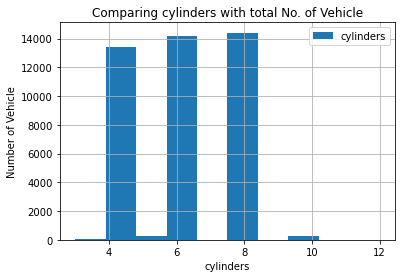

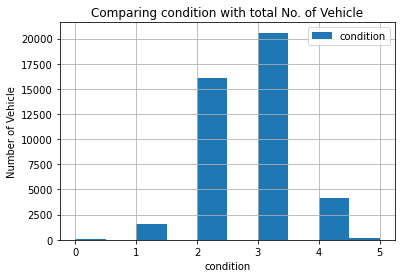

In [19]:
hist_list=['price', 'vehicle_age', 'average_mileage_perYear', 'cylinders', 'condition']
for param in hist_list:
    ax=data_raw.plot(title='Comparing '+param+' with total No. of Vehicle',kind='hist',y=param, grid=True)
    #data_raw.hist(param) 
    ax.set_xlabel(param)
    ax.set_ylabel('Number of Vehicle')
    
    plt.show()

#### Conclusion

1. Histograme of Price: Found some invalid distribution in the price. Majority of vehicle fall in the price range (0 to 50000). there is spike at 0 which is also point of concern and needs to be checked with the team.
2. Histograme of Vehicle_Age: There is also invalid distribution, majority of vehicle's age less than 10 years. so we will filter all high range data first.
3. Histograme of Average Mileage Per Year: Most of the vehicle avg. mileage is less than 50000.

After checking the above graph, found that data is invalid distributed so in the next section try to remove all outlier and see, if there are some impact on the graph.



### 2. Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame.

In [20]:
print('Data count before removing outliers: ',len(data_raw))
hist_list=[ 'vehicle_age', 'average_mileage_perYear', 'cylinders', 'condition']
#Checking outlier for Price
Q1_price=data_raw['price'].quantile(0.25)
Q3_price=data_raw['price'].quantile(0.75)
IQR_price=Q3_price-Q1_price
data_raw_fil=data_raw.query('price >=(@Q1_price-1.5*@IQR_price) & price<=(@Q3_price+1.5*@IQR_price)')
print('Data count after removing outliers for price: ',len(data_raw_fil))

for param in hist_list:
    Q1=data_raw[param].quantile(0.25)
    Q3=data_raw[param].quantile(0.75)
    IQR=Q3-Q1
    quer=param+ '>=(@Q1-1.5*@IQR) & '+param+'<=(@Q3+1.5*@IQR)'
    #print ()
    data_raw_fil=data_raw_fil.query(quer)
    print('Data count after removing outliers for '+ param+':' ,len(data_raw_fil))


Data count before removing outliers:  42602
Data count after removing outliers for price:  40751
Data count after removing outliers for vehicle_age: 39779
Data count after removing outliers for average_mileage_perYear: 38072
Data count after removing outliers for cylinders: 38072
Data count after removing outliers for condition: 37891


#### Conclusion:
1. So now we have removed some outliers and store the data in the new df 'data_raw_fil'. 

### 3. Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

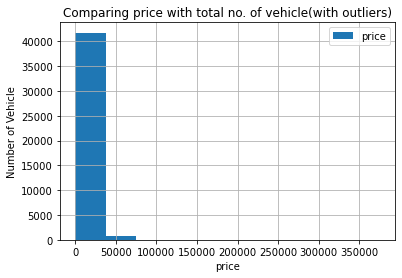

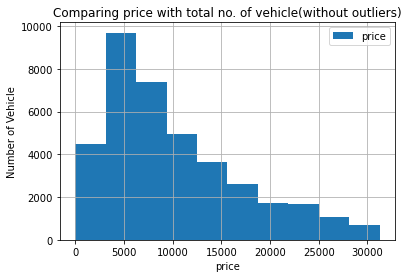

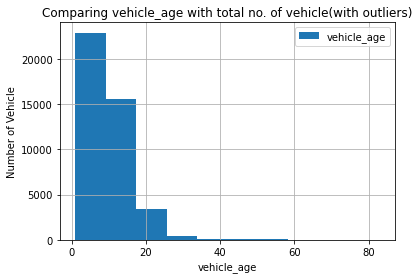

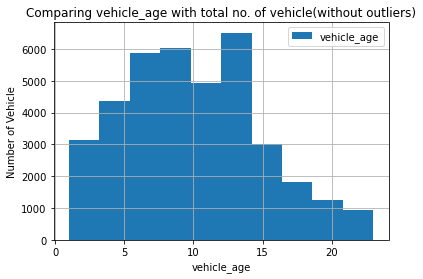

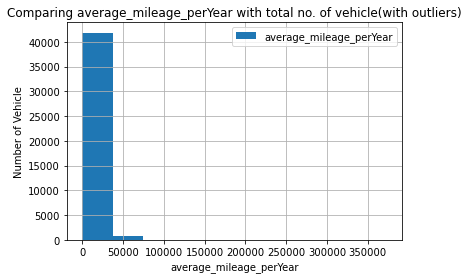

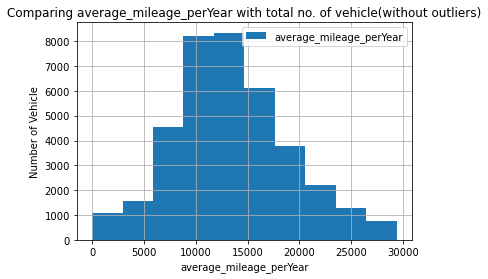

In [21]:
hist_list=['price', 'vehicle_age', 'average_mileage_perYear']
for param in hist_list:
    #code to plot histograme without data
    ax=data_raw.plot(title='Comparing '+param+' with total no. of vehicle(with outliers)',kind='hist',y=param, grid=True)
    #data_raw.hist(param) 
    ax.set_xlabel(param)
    ax.set_ylabel('Number of Vehicle')
    plt.show()
    
    #code to plot histograme with filtered data
    ax2=data_raw_fil.plot(title='Comparing '+param+' with total no. of vehicle(without outliers)',kind='hist',y=param, grid=True)
    ax2.set_xlabel(param)
    ax2.set_ylabel('Number of Vehicle')
    plt.show()

#### Conclusion
1. <b>Comparison between Price and Total no. of Vehicle:</b> After filteration, the data looks somewhat reasonable except the ones that's belongs to 0 price which we will mention in our report and discuss with the Team. Also found that most of the vehicles belongs to low price and as the price increase vehicle count decrease.
2. <b>Comparison between vehicle_age and Total no. of Vehicle:</b> Found most of the vehicle's age range from 1 to 10 years. Which shows that in our site many vehicle are new. Only some of them are old.
3. <b>Comparison between average_mileage_perYear and Total no. of Vehicle:</b> After filteration mileage range becomes 0 to 30000 approx. Most of the vehicle's avg mileage is between 10k to 15k.
4. For cylinders and condition, we can plot bar chart as there are few unique values in both the columns. So in the below section the same will be done and then compare.

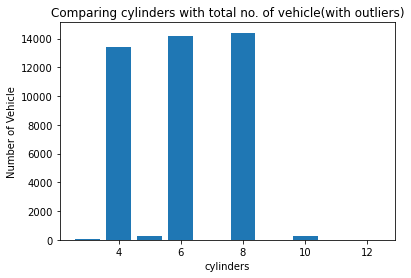

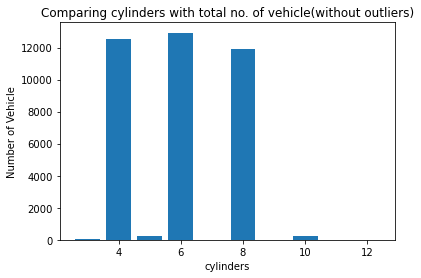

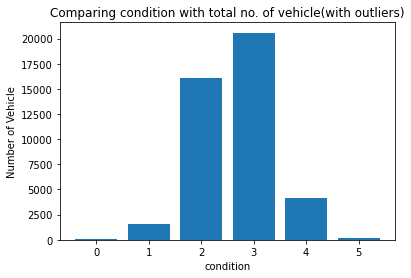

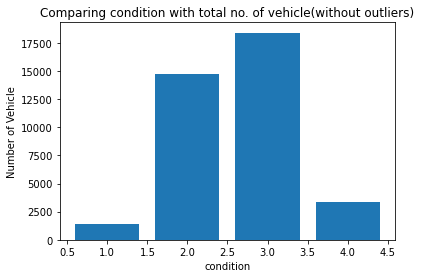

In [22]:
#code to create bar diagrame for cylinder and condition.
bar_list=['cylinders', 'condition']
for param in bar_list:
    data_raw_condition=data_raw[param].value_counts()
    plt.bar(data_raw_condition.index, data_raw_condition.values)
    plt.xlabel(param)
    plt.ylabel('Number of Vehicle')
    plt.title('Comparing '+param+' with total no. of vehicle(with outliers)')
    #ax.set_xlabel('condition')
    #ax.set_ylabel('Number of Vehicle')
    plt.show()

    data_raw_fil_condition=data_raw_fil[param].value_counts()
    plt.bar(data_raw_fil_condition.index, data_raw_fil_condition.values)
    plt.title('Comparing '+param+' with total no. of vehicle(without outliers)')
    plt.xlabel(param)
    plt.ylabel('Number of Vehicle')
    plt.show()

#### Conclusion
Found no reasonable difference with respect to cylinders and condition.

### 4. Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

count    37891.000000
mean        39.540075
std         28.163018
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


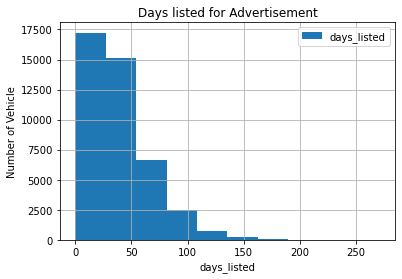

Mean and Median of days_listed are: 39.540075479665354, 33.0
Typical lifetime of the ad fall in the range: 19.0, 53.0
Count of vechicles for which ads were listed too short:  9932
Count of vechicles for which ads were listed too long:  9801


In [23]:
#print(data_raw_fil.head())
print(data_raw_fil['days_listed'].describe())
ax=data_raw.plot(title='Days listed for Advertisement',kind='hist',y='days_listed', grid=True)
ax.set_xlabel('days_listed')
ax.set_ylabel('Number of Vehicle')
#data_raw_fil.hist('days_listed')
plt.show()
print('Mean and Median of days_listed are: {0}, {1}'.format(data_raw_fil['days_listed'].mean(), data_raw_fil['days_listed'].median()))

Q1_days_listed=data_raw_fil['days_listed'].quantile(0.25)
Q3_days_listed=data_raw_fil['days_listed'].quantile(0.75)
IQR_days_listed=Q3_days_listed-Q1_days_listed
print('Typical lifetime of the ad fall in the range: {0}, {1}'.format(Q1_days_listed, Q3_days_listed))

data_raw_fil_dayslisted=data_raw_fil
data_raw_fil_dayslisted['days_listed_too_short']=data_raw_fil_dayslisted['days_listed']<=Q1_days_listed
data_raw_fil_dayslisted['days_listed_too_long']=data_raw_fil_dayslisted['days_listed']>=Q3_days_listed
print('Count of vechicles for which ads were listed too short: ',len(data_raw_fil_dayslisted[(data_raw_fil_dayslisted['days_listed_too_short']==True)]))

print('Count of vechicles for which ads were listed too long: ',len(data_raw_fil_dayslisted[(data_raw_fil_dayslisted['days_listed_too_long']==True) ]))


#### Conclusion:
1. There are some vehicles which are listed for 0 days only. Thats looks strange. May be because in our site vehicle's prices are as low as 0 compare to other dealer. so they were sold immediately. Or the seller of the vehicle don't want to put their vehicles with us and remove it from our store.
2. Total of 'too short' and 'too long' is aprox. half of data.

### 5. Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads

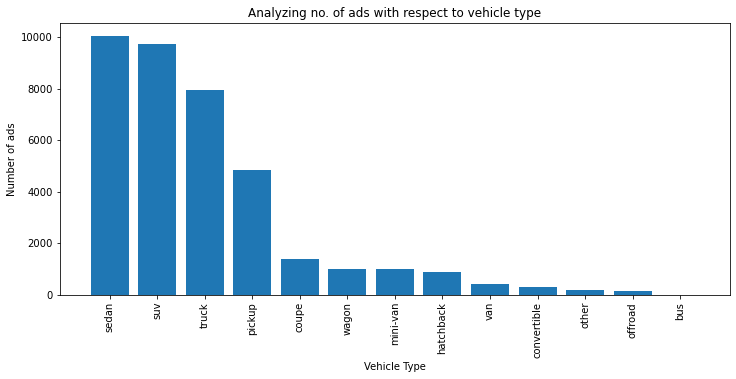

In [24]:
data_raw_fil_avg_price= data_raw_fil.pivot_table(index='type', values=['price'], aggfunc=['median'])
data_raw_fil_avg_price.columns=['Avg. Price']
#display(data_raw_fil_avg_price.sort_values(by='Avg. Price',ascending=False))

data_raw_fil_No_of_ads_pvt= data_raw_fil.pivot_table(index='type', values=['days_listed'], aggfunc=['count'])
data_raw_fil_No_of_ads_pvt.columns=['No. of ads']
data_raw_fil_No_of_ads_pvt=data_raw_fil_No_of_ads_pvt.sort_values(by='No. of ads',ascending=False)
data_raw_fil_No_of_ads_pvt.reset_index()
#display(data_raw_fil_No_of_ads_pvt)


#data_raw_fil_No_of_ads_pvt.plot(kind='bar', grid=True)
plt.figure(figsize=(12,5))
plt.bar(data_raw_fil_No_of_ads_pvt.index, data_raw_fil_No_of_ads_pvt['No. of ads'])
plt.title('Analyzing no. of ads with respect to vehicle type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of ads')
plt.xticks(rotation=90)
plt.show()


#### Conclusion

There are mainly 3 or 4 types of vehicle for which no. of ads are very high. So that's mean we can use top category of vehicles for our futher analysis.
Top 2 vehicle with greatest no. of ads are 'suv' and 'sedan'. No. of ads are also more than 11000.

### 6. What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

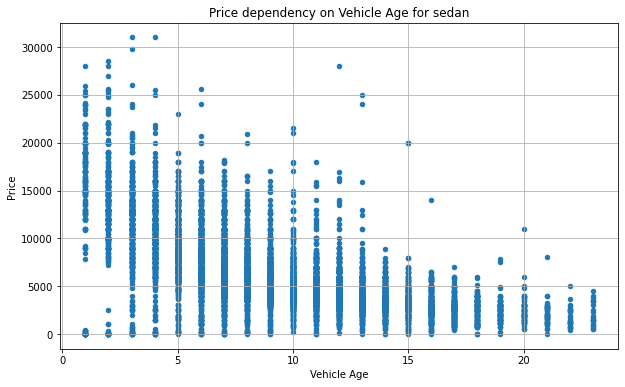

Pearson correlation coefficient are:  -0.6400137531155563


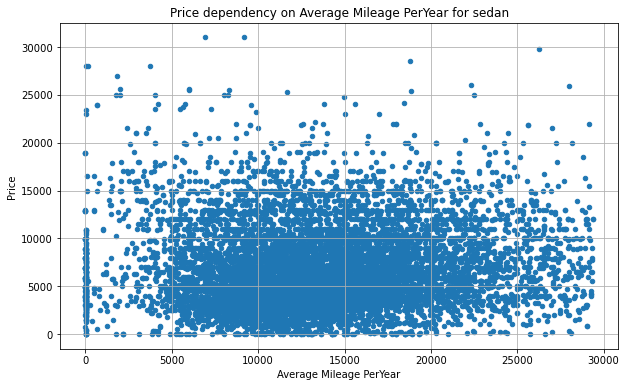

Pearson correlation coefficient are:  0.06602296271970988


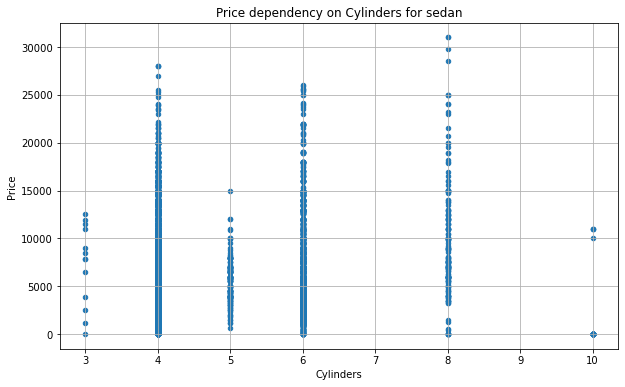

Pearson correlation coefficient are:  -0.029516692095753465


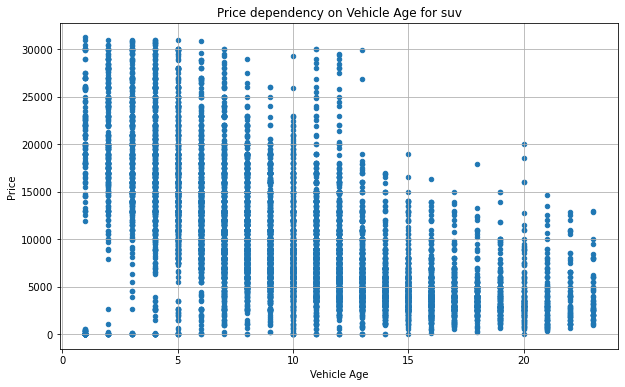

Pearson correlation coefficient are:  -0.6134923494407876


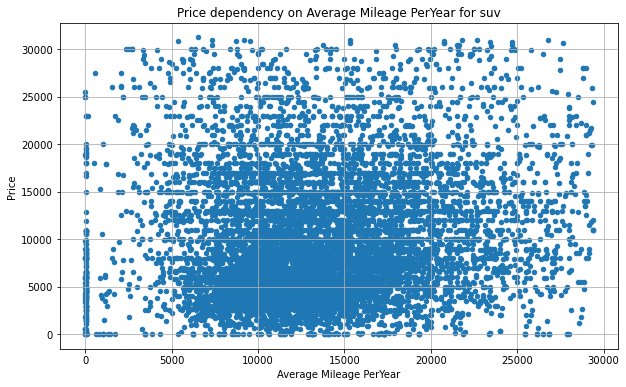

Pearson correlation coefficient are:  0.1428668083717787


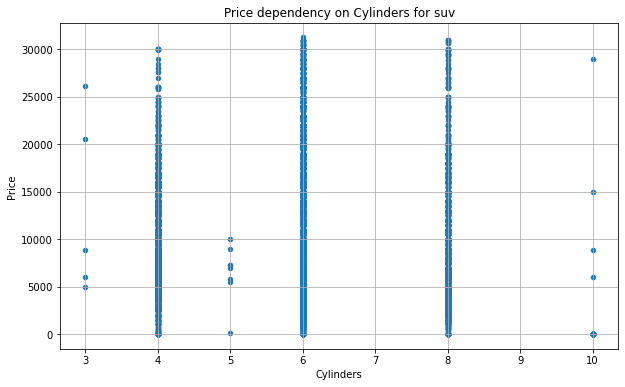

Pearson correlation coefficient are:  -0.04021386494614238


In [25]:
vehicle_type=['sedan','suv']# Categories for which we will do further analysis.
data_raw_fil=data_raw_fil[data_raw_fil['type'].isin(vehicle_type)]

quantative_col_dic={'vehicle_age':'Vehicle Age','average_mileage_perYear':'Average Mileage PerYear','cylinders':'Cylinders'}
for param in vehicle_type:
    data_raw_fil_veh=data_raw_fil[data_raw_fil['type']==param]
    #print(data_raw_fil_veh.head())
    for  key, value in quantative_col_dic.items():
        data_raw_fil_veh.plot(kind='scatter', x=key, y='price' , style='o',grid=True,figsize=(10, 6),legend=False)# the lower the vehicle age the more price.
        plt.ylabel('Price')
        plt.xlabel(value)
        plt.title('Price dependency on '+value+' for '+param)
        plt.show()
        print('Pearson correlation coefficient are: ', data_raw_fil_veh['price'].corr(data_raw_fil_veh[key]))
    
    
    
    

#### Conclusion:
1. Relation between Price and Age: After analysing we can say that, there is some negative relatioship between these two. As the Age incease the price decrease but the main concern here is why 0 price is also there for 1 years old vehicle.
2. Relation between Price and Avg. Mileage per year: There is nominal change in price due to Avg. mileage. Also many dots in the centre doesn't reveal anything significantly.
3. Relation between Price and Cylinders: Found no relationship between price and Cylinder. For same cylinder we can have different price from lowest to highest.
    

In [27]:
print(data_raw_fil.pivot_table(index='condition', values=['days_listed'], aggfunc=['count']))
print(data_raw_fil.pivot_table(index='transmission', values=['days_listed'], aggfunc=['count']))
print(data_raw_fil.pivot_table(index='paint_color', values=['days_listed'], aggfunc=['count']))

                count
          days_listed
condition            
1                 563
2                7154
3               10057
4                1985
                   count
             days_listed
transmission            
automatic          18689
manual               892
other                178
                  count
            days_listed
paint_color            
black              3048
blue               1840
brown               524
custom              452
green               535
grey               2229
orange               65
purple               51
red                1482
silver             2905
unknown            3911
white              2658
yellow               59


##### Conclusion
Added above code to verify whether there are any categories which contain less than 50 ads but as we can see there are no such category found.
We still write the code in below section to remove those category(s) which have less than 50 ads and after that plot box-and-whisker charts for the same.

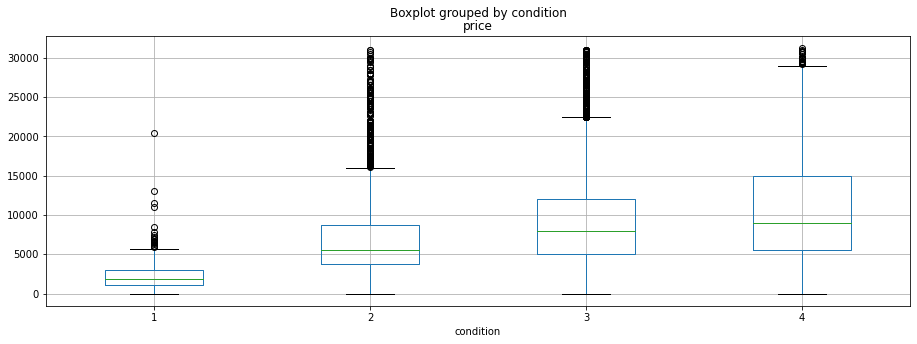

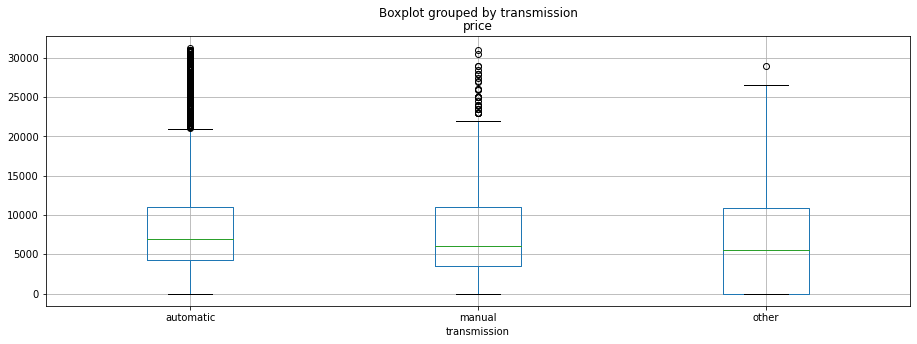

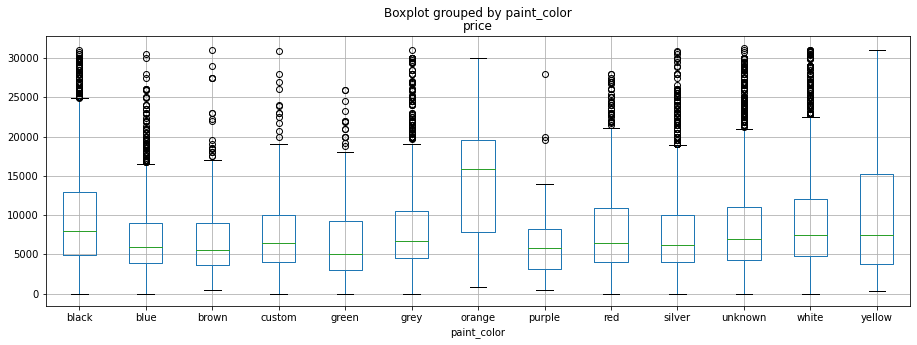

In [28]:
warnings.filterwarnings('ignore')
category_col_dic={'condition':'condition','transmission':'transmission','paint_color':'paint_color'}

for  key, value in category_col_dic.items():
    data_raw_fil_pvt_temp= data_raw_fil.pivot_table(index=key, values=['days_listed'], aggfunc=['count'])
    data_raw_fil_pvt_temp.columns=['adsCount']
    remove_category=data_raw_fil_pvt_temp[data_raw_fil_pvt_temp['adsCount']<=50]
    data_raw_fil_final=data_raw_fil.query(key+' not in @remove_category.index')
    #print(data_raw_fil.query('condition in @remove_category.index'))
    axes=data_raw_fil_final.boxplot(by=key,column=['price'], return_type='axes',figsize=(15,5))
    plt.show()


#### Conclusion:
1. Relationship between price and condition: We can see that there is positive relationship between condition and price. As we 
move from left to right i.e from 'fair' to 'like new' condition, prices are also increases. but there are still many outliers available.   
2. Relationship between price and transmission: Found no such relationship between these two parameters. 
3. Relationship between price and paint_color: Some People have paid high prices for Orange and Yellow color but as such no significant relationship found.  
    

## Step 5. Overall conclusion

### Data for Bug Report

In [29]:
#Data for bug report.
print('Records count with price 1: ',len(data_raw_fil[data_raw_fil['price']<=1]))
print('Records count with days_listed_too_short : ', len(data_raw_fil_dayslisted[data_raw_fil_dayslisted['days_listed_too_short']==True]))

print('Records count with days_listed as 0 : ',len(data_raw_fil_dayslisted[data_raw_fil_dayslisted['days_listed']==0]))
print()
print('###################All vehicle type which are listed for short period of time.#################################')
#print all vehicle type which are listed for short period of time.

print(data_raw_fil_dayslisted.groupby('type')['days_listed_too_short'].agg('sum'))

#print data for sedan which are listed for short period of time.
#print(data_raw_fil_dayslisted[(data_raw_fil_dayslisted['days_listed_too_short']==True) & (data_raw_fil_dayslisted['type']=='sedan')])
print()
print('###################All vehicle type which are listed for 0 or 1 price.#################################')
print(data_raw_fil[data_raw_fil['price']<=1])


print()
print('###################All vehicle type which are listed for long period of time.#################################')
#print all vehicle type which are listed for long period of time.
print(data_raw_fil_dayslisted.groupby('type')['days_listed_too_long'].agg('sum'))

Records count with price 1:  190
Records count with days_listed_too_short :  9932
Records count with days_listed as 0 :  42

###################All vehicle type which are listed for short period of time.#################################
type
bus               2
convertible      75
coupe           348
hatchback       222
mini-van        263
offroad          43
other            58
pickup         1273
sedan          2652
suv            2476
truck          2140
van             113
wagon           267
Name: days_listed_too_short, dtype: int64

###################All vehicle type which are listed for 0 or 1 price.#################################
       price  model_year                  model  cylinders fuel  odometer  \
3808     1.0        2007        chevrolet tahoe          8  gas     200.0   
8115     1.0        2005         toyota 4runner          6  gas  137000.0   
9168     1.0        2017        ford expedition         10  gas   56048.0   
9169     1.0        2014          jeep wran

### Conclusion
1. After looking at all the parameters, found that Price is somewhere depend on Age and Condition but not all others. May be we have to investigate more parameters with combination of above parameter like model and model_year to find the price dependencies.
2. We have calculated coefficients as well which proof that vehicle age and condition play an important role for deciding the price of any vehicle.
3. From the above analysis, we can say that among all types suv, sedan are the most popular types.
2. More over we also found some data which needs further investigation like:
   Vehicles with Price as 1 ,
   Vehicles which are listed for 0 days
   

so will also share all these data with team and investigate possible cause for this.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn